In [3]:
import nibabel as nib
import nilearn
from nilearn import plotting

c:\Users\D\anaconda3\envs\MRI37\lib\site-packages\nilearn\image\resampling.py:545: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
c:\Users\D\anaconda3\envs\MRI37\lib\site-packages\nilearn\image\resampling.py:545: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


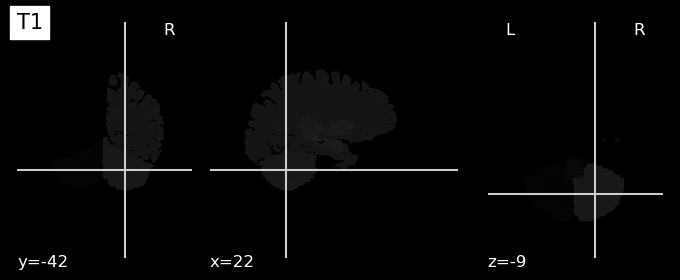

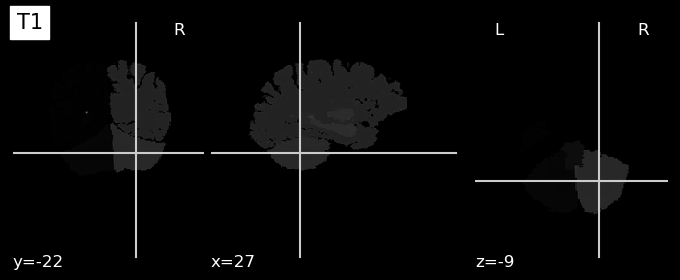

In [15]:
local_data_dir = 'IXI_aseg/'
T1_filename_1 = local_data_dir+"IXI002-Guys-0828-T1_aseg.nii.gz"
T1_filename_2 = local_data_dir+"IXI012-HH-1211-T1_aseg.nii.gz"
T1_img_1 = nib.load(T1_filename_1)
T1_img_2= nib.load(T1_filename_2)

# grab data array
T1_data_1 = T1_img_1.get_fdata()
T1_data_2 = T1_img_2.get_fdata()

# plot
plotting.plot_anat(T1_filename_1, title="T1", vmax=500)
plotting.plot_anat(T1_filename_2, title="T1", vmax=300)

In [18]:
# show T1-image information
print(T1_img_1.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.9375    0.9375    1.199997  0.        1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Jul 23 2020'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.468175
quatern_c       : -0.5299172
quatern_d       : -0.468175
qoffset_x       : -88.63989
qof

(256, 256, 150)


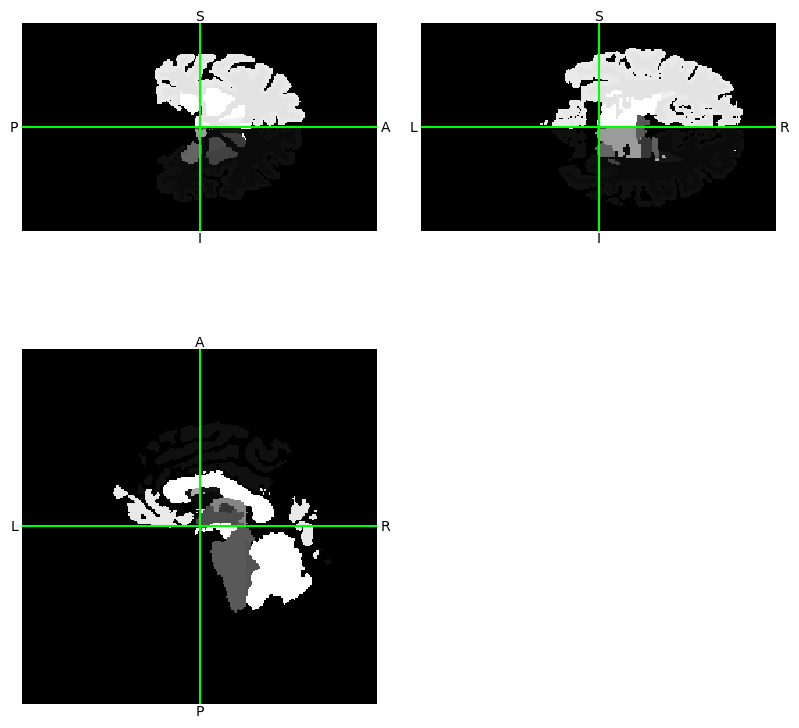

In [28]:
# show image size
print(T1_img_1.dataobj.shape)

from nibabel.viewers import OrthoSlicer3D

# create OrthoSlicer3D Viewer object
osViewer = OrthoSlicer3D(T1_img_1.dataobj[:,:,:])

# setting position of 3-axis
osViewer.set_position(128, 128, 75)

# show 3-axis
osViewer.show()

In [31]:
import numpy as np
import os
from collections import Counter

In [60]:
roiIndex = 10
atlas_nii = nib.load(T1_filename_1)
atlas_arr = atlas_nii.get_fdata()

In [61]:
mask_arr = atlas_arr.copy()
mask_arr[atlas_arr != roiIndex] = 0
mask_arr[atlas_arr == roiIndex] = 1
mask_affine = atlas_nii.affine.copy()
mask_hrd = atlas_nii.header.copy()
mask_hrd["cal_max"] = 1
#print(mask_hrd)

mask_nii = nib.Nifti1Image(mask_arr, mask_affine, mask_hrd)
nib.save(mask_nii,os.path.join(local_data_dir, "roi_" + str(roiIndex) + ".nii.gz"))
print(Counter(mask_arr.flatten()))

Counter({0.0: 9821851, 1.0: 8549})
